#📌 Extracción

In [1]:
import pandas as pd

In [2]:
import requests
import json

url = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
resultado = json.loads(url.text)
df = pd.DataFrame(resultado)

In [3]:
datos = pd.json_normalize(resultado)
datos.head(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

##Conociendo los datos

In [4]:
#Conocer la estructura del df
datos.shape

(7267, 21)

In [5]:
#Conocer las columnas
datos.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [6]:
#Conocer el tipo de dato de cada columna
datos.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


##Verificando incoherencias y nulos

In [7]:
#Para verificar si hay valores nulos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [8]:
#Otra forma de saber si hay valores nulos
datos.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [9]:
#Para saber si hay clientes repetidos
datos['customerID'].nunique()

7267

In [10]:
#Para saber si hay falta de información en alguna de las filas de las otras columnas
for i in range(1,21):
  column_name = datos.columns[i]
  print(f'{column_name}: {datos[column_name].unique()}')

Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.SeniorCitizen: [0 1]
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.Paymen

In [11]:
#Vamos a verificar que aquellos clientes que NO se han ido de la compañía tengan al menos un servicio contratado
seleccion1 = datos["Churn"]=='No'
seleccion2 = datos["phone.PhoneService"]=='No'
seleccion3 = datos["internet.InternetService"]=='No'
filtro1 = datos[seleccion1 & seleccion2 & seleccion3]
filtro1

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [12]:
#Visualizar aquellos datos que no son float en la columna de Cargos Totales
seleccion4 = datos['account.Charges.Total']== ' '
filtro2 = datos[seleccion4]
filtro2

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [13]:
#Con el filtro anterior vimos que los que tienen ' ' en cargo total son clientes nuevos, vamos a verifical el total de clientes nuevos
clientes_nuevos= 0
for i in range(len(datos['customer.tenure'])):
  if datos['customer.tenure'][i] == 0:
    clientes_nuevos += 1
print(f'Cantidad de clientes nuevos: {clientes_nuevos}')

Cantidad de clientes nuevos: 11


In [14]:
#Renombrar las columnas para trabajar más fácil
datos.rename(columns={'customer.gender':'gender'}, inplace=True)
datos.rename(columns={'customer.SeniorCitizen':'senior_citizen'}, inplace=True)
datos.rename(columns={'customer.Partner':'partner'}, inplace=True)
datos.rename(columns={'customer.Dependents':'dependents'}, inplace=True)
datos.rename(columns={'customer.tenure':'tenure'}, inplace=True)
datos.rename(columns={'phone.PhoneService':'phone_service'}, inplace=True)
datos.rename(columns={'phone.MultipleLines':'multiple_lines'}, inplace=True)
datos.rename(columns={'internet.InternetService':'internet_service'}, inplace=True)
datos.rename(columns={'internet.OnlineSecurity':'online_security'}, inplace=True)
datos.rename(columns={'internet.OnlineBackup':'online_backup'}, inplace=True)
datos.rename(columns={'internet.DeviceProtection':'device_protection'}, inplace=True)
datos.rename(columns={'internet.TechSupport':'tech_support'}, inplace=True)
datos.rename(columns={'internet.StreamingTV':'streaming_tv'}, inplace=True)
datos.rename(columns={'internet.StreamingMovies':'streaming_movies'}, inplace=True)
datos.rename(columns={'account.Contract':'contract'}, inplace=True)
datos.rename(columns={'account.PaperlessBilling':'paperless_billing'}, inplace=True)
datos.rename(columns={'account.PaymentMethod':'payment_method'}, inplace=True)
datos.rename(columns={'account.Charges.Monthly':'monthly_charges'}, inplace=True)
datos.rename(columns={'account.Charges.Total':'total_charges'}, inplace=True)

datos.sample(5)

,customerID,Churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
43,0071-NDAFP,No,Male,0,Yes,Yes,25,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.5,630.6
6339,8722-NGNBH,Yes,Male,0,No,No,5,No,No phone service,DSL,...,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,40.0,223.45
1016,1428-IEDPR,No,Male,0,No,No,52,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,109.3,5731.4
5761,7872-RDDLZ,No,Female,1,No,No,67,Yes,Yes,DSL,...,Yes,No,No,No,No,Month-to-month,No,Electronic check,54.9,3725.5
1307,1875-QIVME,Yes,Female,0,Yes,No,2,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.4,242.8


##Manejo de inconsistencias

###Eliminando clientes sin información en total_charges

In [15]:
#Vamos a crear la query para elegir los datos de tenure que vamos a borrar (clientes nuevos)
removedor_tenure = datos.query('tenure == 0').index

In [16]:
#Remover los datos
datos.drop(removedor_tenure, axis=0, inplace=True)

In [17]:
#Verificar la cantidad de filas, para comprobar que fueron removidas
datos.shape

(7256, 21)

###Cambiando tipo de dato total_charges

In [18]:
#Ahora podemos cambiar el tipo de dato de total_charges de string a float
import numpy as np
datos['total_charges'] = datos['total_charges'].astype(np.float64)

In [19]:
#Comprobando que se haya cambiado el tipo
datos['total_charges'].dtypes

dtype('float64')

###Eliminando clientes sin información sobre si dejó o no la empresa

In [20]:
removedor_churn = datos.query("Churn == ''").index
datos.drop(removedor_churn, axis = 0, inplace= True)
datos.shape

(7032, 21)

In [21]:
datos["Churn"].unique()

array(['No', 'Yes'], dtype=object)

###Eliminando los paréntesis del texto

In [22]:
datos['payment_method']=datos['payment_method'].str.replace('[^a-zA-Z ]','',regex=True)
datos['payment_method'].unique()

array(['Mailed check', 'Electronic check', 'Credit card automatic',
       'Bank transfer automatic'], dtype=object)

##Creando columna cuentas diarias

In [23]:
datos['cuentas_diarias'] = (datos['monthly_charges']/30).round(2)
datos['cuentas_diarias'].sample(5)

,cuentas_diarias
1578,2.68
895,3.23
3522,3.47
3264,3.38
5463,2.86


##Estandarización y transformación de datos

In [24]:
#Para saber si hay falta de información en alguna de las filas de las otras columnas
for i in range(7,18):
  column_name = datos.columns[i]
  print(f'{column_name}: {datos[column_name].unique()}')

phone_service: ['Yes' 'No']
multiple_lines: ['No' 'Yes' 'No phone service']
internet_service: ['DSL' 'Fiber optic' 'No']
online_security: ['No' 'Yes' 'No internet service']
online_backup: ['Yes' 'No' 'No internet service']
device_protection: ['No' 'Yes' 'No internet service']
tech_support: ['Yes' 'No' 'No internet service']
streaming_tv: ['Yes' 'No' 'No internet service']
streaming_movies: ['No' 'Yes' 'No internet service']
contract: ['One year' 'Month-to-month' 'Two year']
paperless_billing: ['Yes' 'No']


In [25]:
#Vamos a verificar que aquellas columnas que tienen como datos backup, protección, etc.. efectivamente no tengan servicio telefónico o de internet
seleccion5 = datos['phone_service'] == 1
seleccion6 = datos['multiple_lines'] == 'No phone service'
filtro3 = datos[seleccion5 & seleccion6]

seleccion7 = (datos['internet_service'] == 'DSL') | (datos['internet_service'] == 'Fiber optic')
seleccion8 = datos['online_security'] == 'No internet service'
seleccion9 = datos['online_backup'] == 'No internet service'
seleccion10 = datos['device_protection'] == 'No internet service'
seleccion11 = datos['tech_support'] == 'No internet service'
seleccion12 = datos['streaming_tv'] == 'No internet service'
seleccion13 = datos['streaming_movies'] == 'No internet service'

filtro4 = datos[seleccion7 & seleccion8]
filtro5 = datos[seleccion7 & seleccion9]
filtro6 = datos[seleccion7 & seleccion10]
filtro7 = datos[seleccion7 & seleccion11]
filtro8 = datos[seleccion7 & seleccion12]
filtro9 = datos[seleccion7 & seleccion13]

print(filtro3.shape)
print(filtro4.shape)
print(filtro5.shape)
print(filtro6.shape)
print(filtro7.shape)
print(filtro8.shape)
print(filtro9.shape)

(0, 22)
(0, 22)
(0, 22)
(0, 22)
(0, 22)
(0, 22)
(0, 22)


In [26]:
datos['Churn'] = datos['Churn'].replace({'Yes':1, 'No':0}).infer_objects(copy=False)
datos['partner'] = datos['partner'].replace({'Yes':1, 'No':0}).infer_objects(copy=False)
datos['dependents'] = datos['dependents'].replace({'Yes':1, 'No':0}).infer_objects(copy=False)
datos['phone_service'] = datos['phone_service'].replace({'Yes':1, 'No':0}).infer_objects(copy=False)
datos['multiple_lines'] = datos['multiple_lines'].replace({'Yes':1, 'No':0, 'No phone service':0}).infer_objects(copy=False)
datos['online_security'] = datos['online_security'].replace({'Yes':1, 'No':0, 'No internet service':0}).infer_objects(copy=False)
datos['online_backup'] = datos['online_backup'].replace({'Yes':1, 'No':0, 'No internet service':0}).infer_objects(copy=False)
datos['device_protection'] = datos['device_protection'].replace({'Yes':1, 'No':0, 'No internet service':0}).infer_objects(copy=False)
datos['tech_support'] = datos['tech_support'].replace({'Yes':1, 'No':0, 'No internet service':0}).infer_objects(copy=False)
datos['streaming_tv'] = datos['streaming_tv'].replace({'Yes':1, 'No':0, 'No internet service':0}).infer_objects(copy=False)
datos['streaming_movies'] = datos['streaming_movies'].replace({'Yes':1, 'No':0, 'No internet service':0}).infer_objects(copy=False)
datos['paperless_billing'] = datos['paperless_billing'].replace({'Yes':1, 'No':0}).infer_objects(copy=False)
datos.head(5)

/tmp/ipython-input-26-3933703687.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['Churn'] = datos['Churn'].replace({'Yes':1, 'No':0}).infer_objects(copy=False)
/tmp/ipython-input-26-3933703687.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['partner'] = datos['partner'].replace({'Yes':1, 'No':0}).infer_objects(copy=False)
/tmp/ipython-input-26-3933703687.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resu

,customerID,Churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [27]:
datos.dtypes

,0
customerID,object
Churn,int64
gender,object
senior_citizen,int64
partner,int64
dependents,int64
tenure,int64
phone_service,int64
multiple_lines,int64
internet_service,object


#📊 Carga y análisis

##Análisis descriptivo

In [28]:
#Describir la totalidad de los datos
descripcion = datos.describe().round(2)
descripcion = descripcion.T
descripcion

,count,mean,std,min,25%,50%,75%,max
Churn,7032.0,0.27,0.44,0.00,0.00,0.00,1.00,1.00
senior_citizen,7032.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00
partner,7032.0,0.48,0.50,0.00,0.00,0.00,1.00,1.00
dependents,7032.0,0.30,0.46,0.00,0.00,0.00,1.00,1.00
tenure,7032.0,32.42,24.55,1.00,9.00,29.00,55.00,72.00
phone_service,7032.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00
multiple_lines,7032.0,0.42,0.49,0.00,0.00,0.00,1.00,1.00
online_security,7032.0,0.29,0.45,0.00,0.00,0.00,1.00,1.00
online_backup,7032.0,0.34,0.48,0.00,0.00,0.00,1.00,1.00
device_protection,7032.0,0.34,0.48,0.00,0.00,0.00,1.00,1.00


##Distribución de la evasión

In [29]:
total_clientes = len(datos['Churn'])
total_sefue = datos['Churn'].sum()
total_no_sefue = total_clientes - total_sefue

condicion_clientes = ['Total clientes','Se fueron','No se fueron']
condicion_cantidad = [total_clientes, total_sefue, total_no_sefue]

churn_dict = {'Condición clientes':condicion_clientes, 'Cantidad':condicion_cantidad}
churn_df = pd.DataFrame(churn_dict)
churn_df

,Condición clientes,Cantidad
0,Total clientes,7032
1,Se fueron,1869
2,No se fueron,5163


In [99]:
porcentaje_abandono = round(total_sefue/total_clientes * 100, 1)
porcentaje_permanencia = round(total_no_sefue/total_clientes * 100, 1)

In [30]:
import matplotlib.pyplot as plt

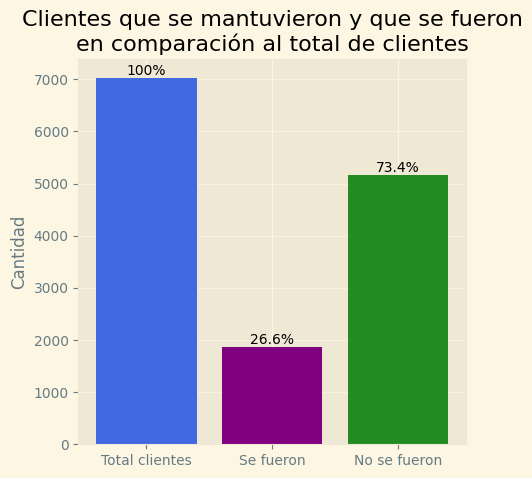

In [100]:
colores_churn = ['royalblue', 'purple', 'forestgreen']
with plt.style.context('Solarize_Light2'):
  fig1, ax = plt.subplots(figsize=(5,5))

  ax.bar(churn_df['Condición clientes'], churn_df['Cantidad'], color = colores_churn)
  ax.set_title('Clientes que se mantuvieron y que se fueron\nen comparación al total de clientes')
  ax.set_ylabel('Cantidad')
  ax.text(0, churn_df['Cantidad'][0],'100%', ha='center', va='bottom')
  ax.text(1, churn_df['Cantidad'][1],f'{porcentaje_abandono}%', ha='center', va='bottom')
  ax.text(2, churn_df['Cantidad'][2],f'{porcentaje_permanencia}%', ha='center', va='bottom')

  ax.grid(linewidth=0.5, axis='y')

  plt.show()

##Recuento de evasión por variables categóricas

In [32]:
evadidos = datos.query('Churn == 1')
evadidos

,customerID,Churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,cuentas_diarias
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
18,0022-TCJCI,1,Male,1,0,0,45,1,0,DSL,...,1,0,0,1,One year,0,Credit card automatic,62.70,2791.50,2.09
19,0023-HGHWL,1,Male,1,0,0,1,0,0,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,25.10,25.10,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,1,Male,1,0,0,21,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Bank transfer automatic,96.80,2030.30,3.23
7246,9965-YOKZB,1,Male,1,0,0,9,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,83.85,790.15,2.80
7260,9985-MWVIX,1,Female,0,0,0,1,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Mailed check,70.15,70.15,2.34
7261,9986-BONCE,1,Female,0,0,0,4,1,0,No,...,0,0,0,0,Month-to-month,0,Bank transfer automatic,20.95,85.50,0.70


In [33]:
total_clientes_evadidos = len(evadidos['Churn'])
total_clientes_evadidos

1869

In [34]:
gender_counts = evadidos['gender'].value_counts()

mujeres = gender_counts.get('Female', 0)
hombres = gender_counts.get('Male', 0)

genero = ['Mujeres', 'Hombres']
cantidad = [mujeres, hombres]

genero_dict = {'Género':genero, 'Cantidad':cantidad}
genero_df = pd.DataFrame(genero_dict)
genero_df

,Género,Cantidad
0,Mujeres,939
1,Hombres,930


In [35]:
senior = evadidos['senior_citizen'].sum()
no_senior = total_clientes_evadidos - senior

senior_dict = {'Senior':['Cliente senior', 'Cliente joven'], 'Cantidad':[senior, no_senior]}
senior_df = pd.DataFrame(senior_dict)
senior_df

,Senior,Cantidad
0,Cliente senior,476
1,Cliente joven,1393


In [36]:
evadidos['internet_service']=evadidos['internet_service'].replace({'Fiber optic':1}).replace({'DSL':1}).replace({'No':0})
evadidos.head()

/tmp/ipython-input-36-595245369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  evadidos['internet_service']=evadidos['internet_service'].replace({'Fiber optic':1}).replace({'DSL':1}).replace({'No':0})
/tmp/ipython-input-36-595245369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evadidos['internet_service']=evadidos['internet_service'].replace({'Fiber optic':1}).replace({'DSL':1}).replace({'No':0})


,customerID,Churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,cuentas_diarias
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80
18,0022-TCJCI,1,Male,1,0,0,45,1,0,1,...,1,0,0,1,One year,0,Credit card automatic,62.7,2791.50,2.09
19,0023-HGHWL,1,Male,1,0,0,1,0,0,1,...,0,0,0,0,Month-to-month,1,Electronic check,25.1,25.10,0.84


In [37]:
filtro_a = evadidos['internet_service']==1
filtro_b = evadidos['internet_service']==0
filtro_c = evadidos['phone_service']==1
filtro_d = evadidos['phone_service']==0

dos_servicios = evadidos[filtro_a & filtro_c]
solo_internet = evadidos[filtro_a & filtro_d]
solo_telefono = evadidos[filtro_b & filtro_c]

In [38]:
dos_servicios_cantidad = len(dos_servicios['Churn'])
solo_internet_cantidad = len(solo_internet['Churn'])
solo_telefono_cantidad = len(solo_telefono['Churn'])

In [39]:
cantidad_servicios = ['Con servicio de internet y teléfono', 'Solo servicio de internet', 'Solo servicio telefónico']
clientes_por_servicio = [dos_servicios_cantidad, solo_internet_cantidad, solo_telefono_cantidad]

servicios_dict = {'Servicio':cantidad_servicios, 'Cantidad':clientes_por_servicio}
servicios_df = pd.DataFrame(servicios_dict)
servicios_df

,Servicio,Cantidad
0,Con servicio de internet y teléfono,1586
1,Solo servicio de internet,170
2,Solo servicio telefónico,113


In [40]:
contract_count = evadidos['contract'].value_counts()

month_to_month = contract_count.get('Month-to-month', 0)
one_year = contract_count.get('One year', 0)
two_year = contract_count.get('Two year', 0)

contract = ['Month-to-month', 'One year', 'Two year']
cantidad = [month_to_month, one_year, two_year]

contract_dict = {'Contrato':contract, 'Cantidad':cantidad}
contract_df = pd.DataFrame(contract_dict)
contract_df

,Contrato,Cantidad
0,Month-to-month,1655
1,One year,166
2,Two year,48


In [41]:
payment_count = evadidos['payment_method'].value_counts()

electronic_check = payment_count.get('Electronic check', 0)
mailed_check = payment_count.get('Mailed check', 0)
bank_transfer = payment_count.get('Bank transfer automatic', 0)
credit_card = payment_count.get('Credit card automatic', 0)

payment_method = ['Electronic check', 'Mailed check', 'Bank transfer automatic', 'Credit card automatic']
cantidad = [electronic_check, mailed_check, bank_transfer, credit_card]

payment_dict = {'Método de pago':payment_method, 'Cantidad':cantidad}
payment_df = pd.DataFrame(payment_dict)
payment_df

,Método de pago,Cantidad
0,Electronic check,1071
1,Mailed check,308
2,Bank transfer automatic,258
3,Credit card automatic,232


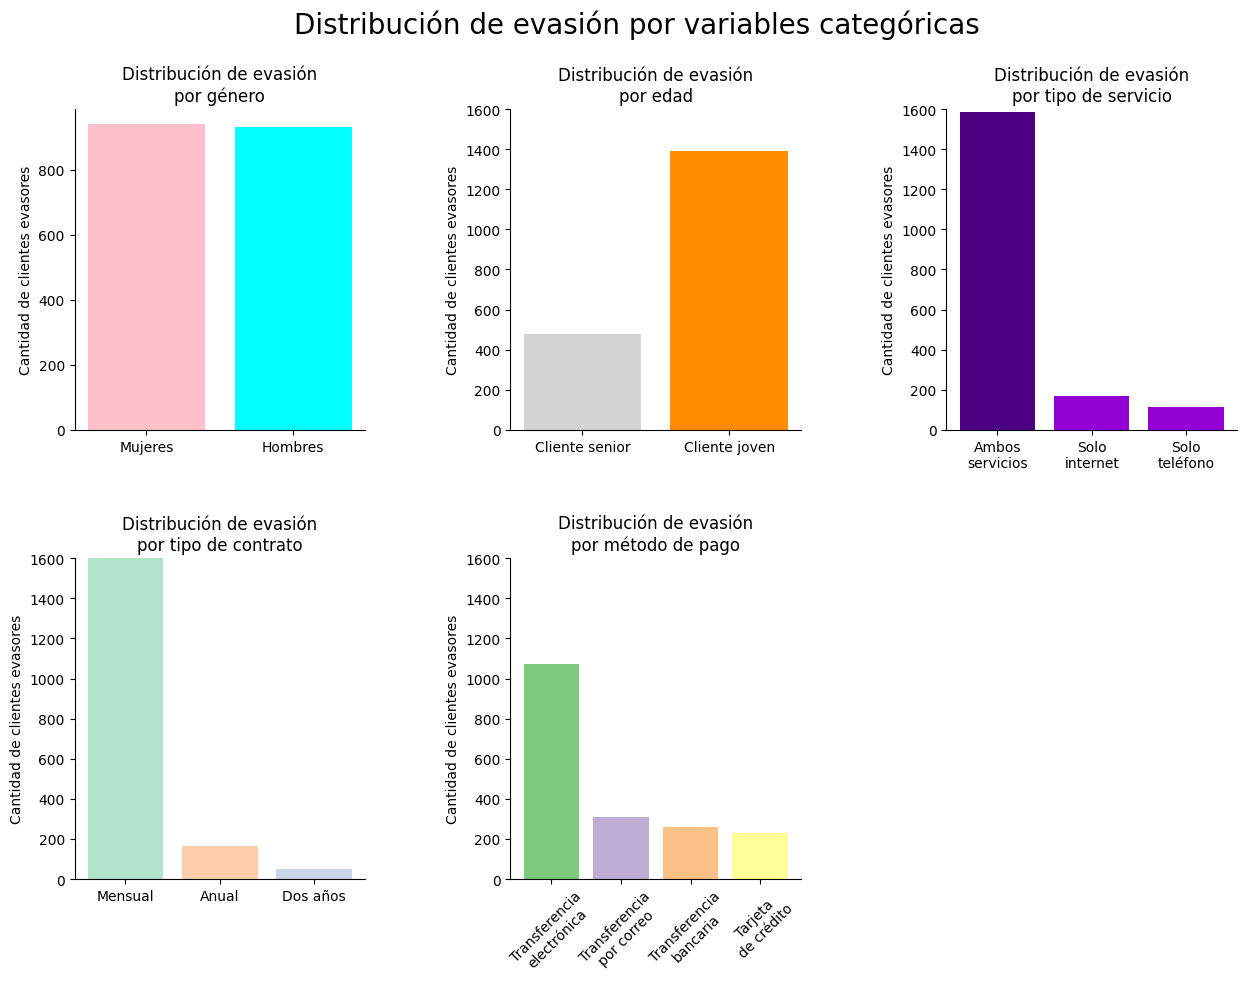

In [108]:
fig2, axs = plt.subplots(2,3, figsize=(15,10))
fig2.subplots_adjust(wspace=0.5, hspace=0.4)
fig2.suptitle('Distribución de evasión por variables categóricas', fontsize=20)

for ax in axs.ravel():
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

axs[0,0].bar(genero_df['Género'], genero_df['Cantidad'], color = ['pink','cyan'])
axs[0,0].set_title('Distribución de evasión\npor género')
axs[0,0].set_ylabel('Cantidad de clientes evasores')

ymin=0
ymax=1600

axs[0,1].bar(senior_df['Senior'], senior_df['Cantidad'], color = ['lightgray','darkorange'])
axs[0,1].set_title('Distribución de evasión\npor edad')
axs[0,1].set_ylabel('Cantidad de clientes evasores')
axs[0,1].set_ylim(ymin,ymax)

servicios_labels = ['Ambos\nservicios', 'Solo\ninternet', 'Solo\nteléfono']
x_positions = [0, 1, 2]
axs[0,2].set_xticks(x_positions)
axs[0,2].set_xticklabels(servicios_labels)
axs[0,2].bar(servicios_df['Servicio'], servicios_df['Cantidad'], color = ['indigo','darkviolet','darkviolet'])
axs[0,2].set_title('Distribución de evasión\npor tipo de servicio')
axs[0,2].set_ylabel('Cantidad de clientes evasores')
axs[0,2].set_ylim(ymin,ymax)

contract_labels = ['Mensual', 'Anual', 'Dos años']
axs[1,0].set_xticks(x_positions)
axs[1,0].set_xticklabels(contract_labels)
axs[1,0].bar(contract_df['Contrato'], contract_df['Cantidad'], color =  plt.color_sequences['Pastel2'])
axs[1,0].set_title('Distribución de evasión\npor tipo de contrato')
axs[1,0].set_ylabel('Cantidad de clientes evasores')
axs[1,0].set_ylim(ymin,ymax)


payment_labels = ['Transferencia\nelectrónica', 'Transferencia\npor correo', 'Transferencia\nbancaria', 'Tarjeta\nde crédito']
x_position = [0, 1, 2, 3]
axs[1,1].set_xticks(x_position)
axs[1,1].set_xticklabels(payment_labels, rotation=45)
axs[1,1].bar(payment_df['Método de pago'], payment_df['Cantidad'], color = plt.color_sequences['Accent'])
axs[1,1].set_title('Distribución de evasión\npor método de pago')
axs[1,1].set_ylabel('Cantidad de clientes evasores')
axs[1,1].set_ylim(ymin,ymax)

axs[1,2].spines['left'].set_visible(False) # Hide left spine
axs[1,2].spines['bottom'].set_visible(False)
axs[1,2].set_xticklabels([])
axs[1,2].set_yticklabels([])
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

plt.show()

##Recuento de evasión por variables numéricas

In [45]:
no_evadidos = datos.query('Churn == 0')
no_evadidos.head()

,customerID,Churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
5,0013-MHZWF,0,Female,0,0,1,9,1,0,DSL,...,0,1,1,1,Month-to-month,1,Credit card automatic,69.40,571.45,2.31
6,0013-SMEOE,0,Female,1,1,0,71,1,0,Fiber optic,...,1,1,1,1,Two year,1,Bank transfer automatic,109.70,7904.25,3.66
7,0014-BMAQU,0,Male,0,1,0,63,1,1,Fiber optic,...,0,1,0,0,Two year,1,Credit card automatic,84.65,5377.80,2.82


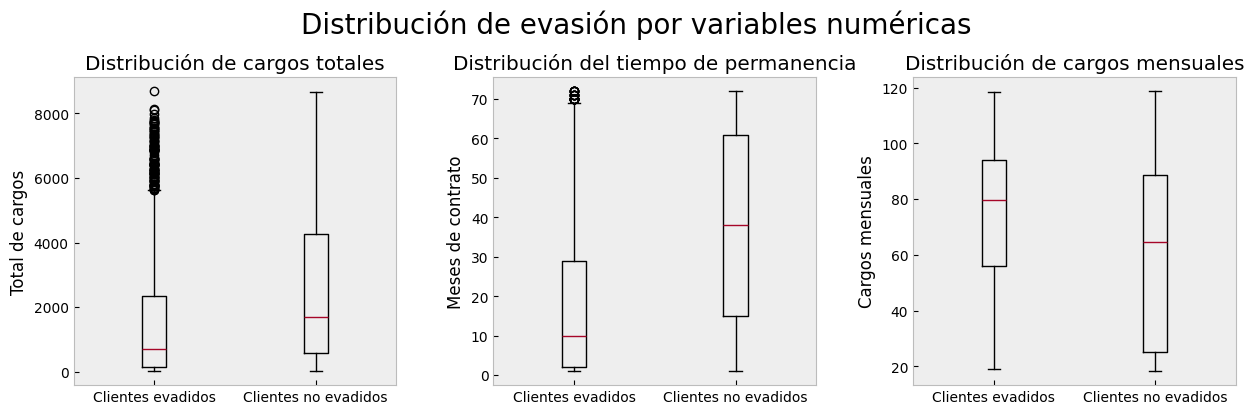

In [103]:
with plt.style.context('bmh'):
  fig3, axs = plt.subplots(1,3, figsize=(15,4))
  fig3.suptitle('Distribución de evasión por variables numéricas', fontsize=20, y=1.05)
  fig3.subplots_adjust(wspace=0.3)

  for ax in axs.flat:
    ax.grid()

  pos = [1,2]

  axs[0].boxplot(evadidos['total_charges'], positions=[pos[0]])
  axs[0].boxplot(no_evadidos['total_charges'], positions=[pos[1]])
  axs[0].set_xticks(pos)
  axs[0].set_xticklabels(['Clientes evadidos', 'Clientes no evadidos'])
  axs[0].set_ylabel('Total de cargos')
  axs[0].set_title('Distribución de cargos totales')

  axs[1].boxplot(evadidos['tenure'], positions=[pos[0]])
  axs[1].boxplot(no_evadidos['tenure'], positions=[pos[1]])
  axs[1].set_xticks(pos)
  axs[1].set_xticklabels(['Clientes evadidos', 'Clientes no evadidos'])
  axs[1].set_ylabel('Meses de contrato')
  axs[1].set_title('Distribución del tiempo de permanencia')

  axs[2].boxplot(evadidos['monthly_charges'], positions=[pos[0]])
  axs[2].boxplot(no_evadidos['monthly_charges'], positions=[pos[1]])
  axs[2].set_xticks(pos)
  axs[2].set_xticklabels(['Clientes evadidos', 'Clientes no evadidos'])
  axs[2].set_ylabel('Cargos mensuales')
  axs[2].set_title('Distribución de cargos mensuales')

  plt.show()

In [86]:
from IPython.display import display

#📄Informe final

**Introducción**

---



La empresa TelecomX LATAM ha presentado una alta tasa de evasión de clientes en el último tiempo, por lo que ha iniciado el proyecto "**Churn de Clientes**" para con el objetivo de comprender los factores que han llevado a la pérdida de clientes. Para cumplir esta tarea es importante conocer los datos recopilados por la empresa, los cuales se han definido en un diccionario de datos con los cuales se trabajó durante el proyecto.

**Limpieza y Tratamiento de Datos**

---


Para importar los datos se ha utilizado la URL de la base de datos de la empresa que mantiene en github en formato JSON, la cual se transformó en un DataFrame para poder trabajarla en Colab.
Antes de trabajar con los datos, se revisó el set de datos a través de la página jsoncrack.com para entender cómo estaba estructurado el archivo. A continuación se procedió a normalizar los datos para que cada uno fuese una columna.
Para conocer los datos del archivo, se revisaron la cantidad de filas y columnas, el nombre de cada columna, y el tipo de dato de cada columna.
A continuación se procedió a verificar la existencia de valores nulos y valores faltantes. Se verificó que no hubiesen inconsistencias como por ejemplo, que aquellos clientes que permanecen en la compañía tengan al menos un servicio contratado.
Luego, se realizaron filtros para conocer aquellos datos no numéricos en columnas que son numéricas como la de Cargos Totales, notando que aquellas sin datos correspondían a clientes nuevos.
Para realizar la limpieza de los datos inconsistentes se realizaron querys para seleccionar a los clientes nuevos y a los clientes que no tenían información sobre si dejaron o no la compañía, para poder eliminar esas filas y trabajar con los datos limpios.
Además, se hizo tratamiento de aquellas columnas de texto que presentaban paréntesis y se verificó que cada columna fuese del tipo correcto de dato.
Se revisaron los datos únicos que tenía cada columna, para estandarizarlos transformándolos en datos binarios y luego se revisó nuevamente que cada columna fuese identificada con el tipo de dato correspondiente.


**Análisis Exploratorio de Datos**

---

En primer lugar se hizo un análisis descriptivo de los datos donde por cada columna se pudo determinar la cantidad de datos, la media, la desviación estándar, el mínimo, el máximo y dónde se ubican el 25%, 50% y 75% de los datos.
A continuación se procedió a evaluar la distribución de la evasión, comparando el total de clientes con la cantidad de clientes que se fueron versus la cantidad de clientes que se quedaron. Esta información la podemos ver en el gráfico "Clientes que se mantuvieron y que se fueron en comparación al total de clientes".

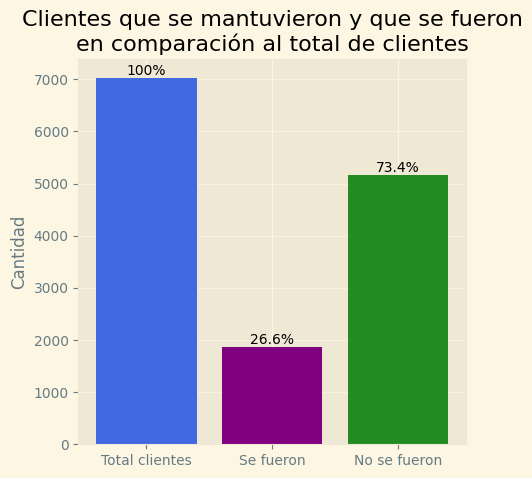

In [101]:
display(fig1)

Luego se creó un DataFrame con aquellos clientes que abandonaron la compañía. A partir de este nuevo DataFrame, se describió este grupo de acuerdo a variables categóricas tales como el género, la edad (senior o no senior), tipo de servicio contratado (internet, teléfono o ambos), tipo de contrato (mensual, anual o dos años) y método de pago (transferencia electrónica, transferencia por correo, transferencia bancaria o tarjeta de crédito). El resultado de éste análisis lo podemos visualizar en la figura "Distribución de evasión por variables categóricas" presentada a continuación.

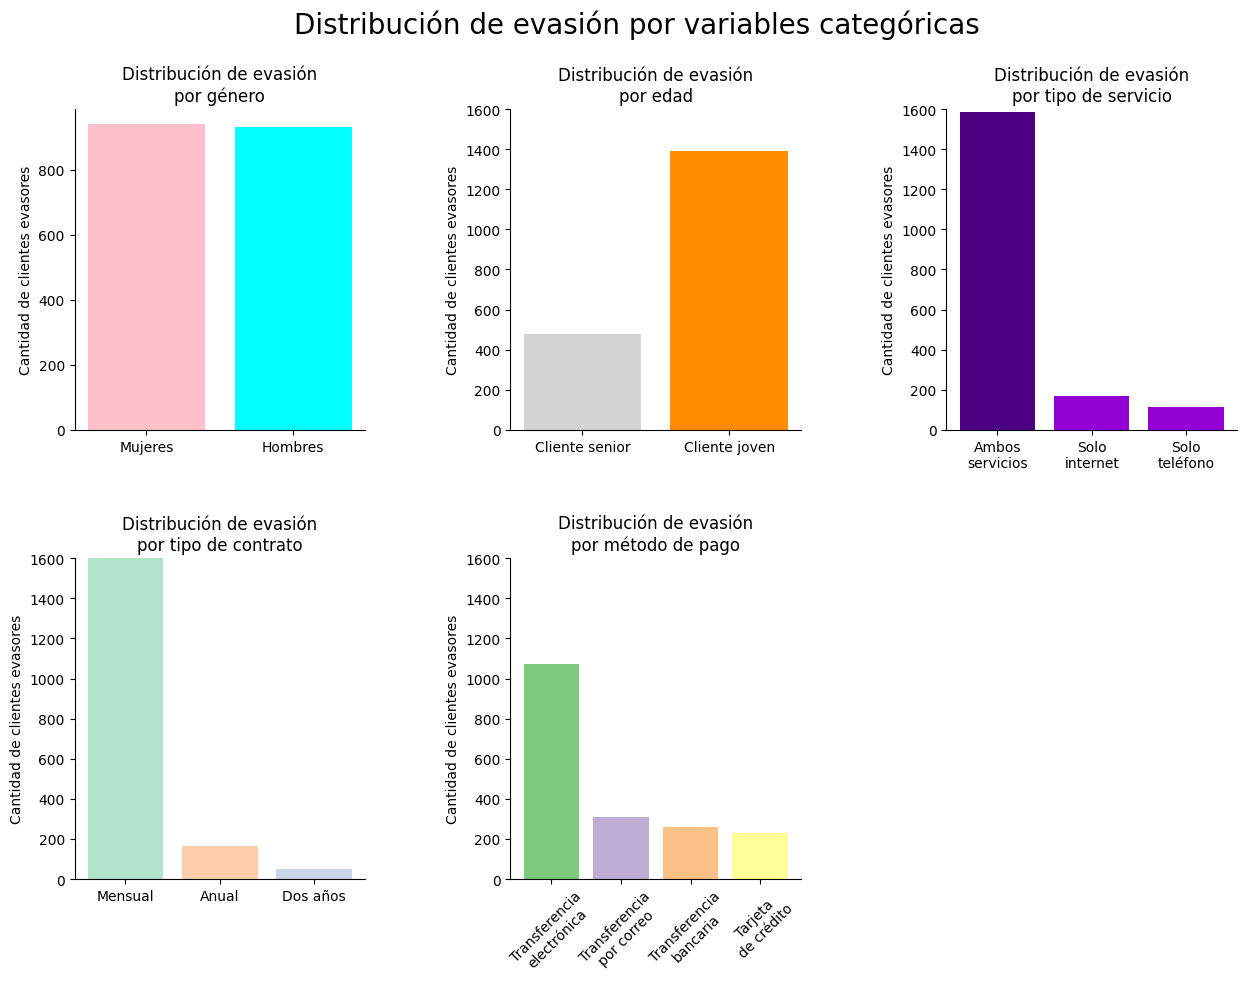

In [109]:
display(fig2)

Finalmente, se creó un DataFrame con aquellos clientes que permanecieron en la compañía con el fin de comparar este grupo con el de evadidos. Para esto se hizo un análisis comparativo entre ambos grupos de las variables numéricas, considerando la distribución de los gastos totales, el tiempo de permanencia y los cargos mensuales. Estas comparaciones las podemos visualizar en la figura presentada a continuación.

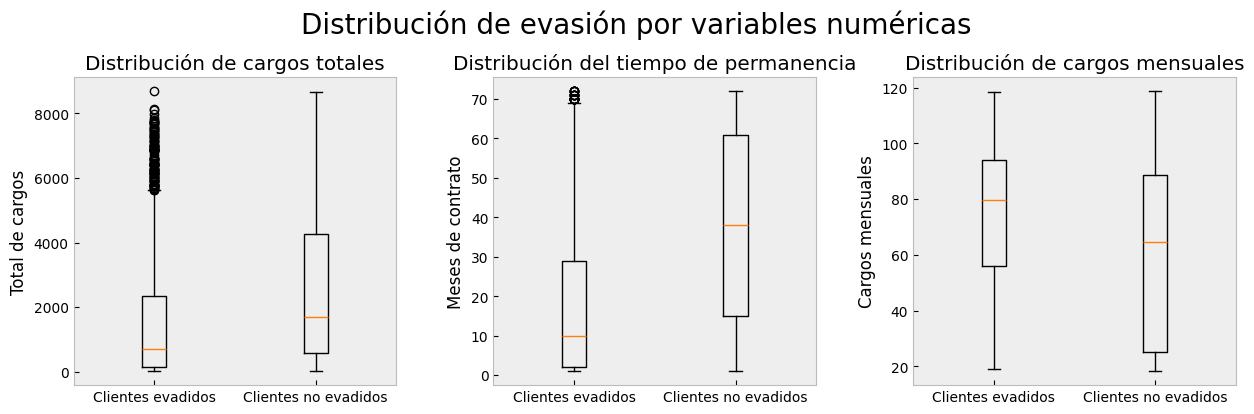

In [104]:
display(fig3)

**Conclusiones e Insights**

---

Al iniciar el análisis exploratorio pudimos determinar que la evación de clientes que sufre TelecomX LATAM es de más del 26% de sus clientes. Al observar el análisis de las variables categóricas podemos observar que el sexo parece no influir en la evasión de clientes, no así la edad, en donde podemos observar que la mayoría de evasores son **clientes jóvenes**. En cuanto a las características de los servicios contratados, podemos observar que la evasión es mayor en aquellos clientes que han contratado **ambos servicios**, realizan un **pago mensual** y realizan el pago por **transferencia electrónica**.
Observando todos los gráficos que parecen explicar la evasión de clientes, en su conjunto podemos teorizar que al ser en su mayoría clientes jóvenes, es común que estos utilicen ambos servicios para estar en contacto con sus redes, además, los jóvenes tienden a hacer compromisos a corto plazo que les permitan experimentar fácilmente, por lo que se explica que mantengan contratos mensuales que les permiten cambiar de compañía fácilmente. Además, usualmente son los clientes jóvenes quienes manejan mayor cantidad de plataformas de pago como las que ofrecen las transferencias electrónicas.

En cuanto a las variables numéricas, podemos observar que en cuanto a los cargos totales, aquellos clientes evadidos tienen una mediana menor a los clientes que permanecen en la compañía, esto podría explicarse al obserbar la gráfica de la distribución por tiempo de permanencia en la cual podemos observar que la mediana de clientes evadidos es notablemente inferior a la de clientes que permanecieron. Sumado a esto, al revisar la distribución de cargos mensuales, notamos que aquellos clientes evadidos tienen una mediana superior, por lo que a pesar de que los clientes evadidos en general tienen cargos totales menores, ellos son los que pagan valores mensuales más altos.

**Recomendaciones**

---

Basándonos en los análisis presentados sugerimos lo siguiente:


1.   Realizar campañas de marketing dirigidas a clientes jóvenes, llamando su atención a través de las mejoras en la oferta de la empresa, dichas mejoras son las que planteamos a continuación.
2.   Ofrecer planes que contengan ambos servicios, los cuales tengan menor costo si es que son contratados a largo plazo, de esta forma se puede retener a los clientes por más tiempo y a la vez disminuir la brecha de facturación mensual entre clientes evadidos y no evadidos.
3.   Fomentar el pago a través de transferencia bancaria, transferencia por correo y tarjeta de crédito, facilitando así el pago de las cuentas.


